In [ ]:
import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.chdir('drive/My Drive/Tensorflow/')

In [ ]:
ls

01-TFv2-creating-tensors.ipynb  LinearRegression_tensorflow.ipynb
02-TF-Graphs.ipynb              regression/
CustomerData.csv                second/
DataAnalysis.ipynb              second_graph/
dense/                          second_graph.ipynb
dense.ipynb                     third/
first_graph/                    third_graph.ipynb
linear_data.csv


## Data Analysis

In [ ]:
data = pd.read_csv('CustomerData.csv')

In [ ]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


# Common Question in Data Analysis
1. Dimension
2. Features and Data types
3. Categorical and Numerical
4. Distribution in the data
5. Correlation between the features
6. Factor Analysis

In [ ]:
data.shape

(3209, 14)

In [ ]:
data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [ ]:
data.dtypes

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    3209 non-null   int64  
 1   City                          3209 non-null   int64  
 2   NoOfChildren                  3209 non-null   int64  
 3   MinAgeOfChild                 3209 non-null   int64  
 4   MaxAgeOfChild                 3209 non-null   int64  
 5   Tenure                        3209 non-null   int64  
 6   FrquncyOfPurchase             3209 non-null   int64  
 7   NoOfUnitsPurchased            3209 non-null   int64  
 8   FrequencyOFPlay               3209 non-null   int64  
 9   NoOfGamesPlayed               3209 non-null   int64  
 10  NoOfGamesBought               3209 non-null   int64  
 11  FavoriteChannelOfTransaction  3209 non-null   object 
 12  FavoriteGame                  3209 non-null   object 
 13  Tot

**CustomerID - nominal level and unique**

**City, FavouriteChannelOf Transaction, FavouriteGame** - Categorial information

Rest all are numerical information

In [ ]:
num_data = data.drop(['City', 'FavoriteChannelOfTransaction', 'FavoriteGame','CustomerID'], axis=1)
cat_data = data[['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']]

In [ ]:
num_data.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
0,2,3,8,210,11,11,2344,108,10,107.51
1,2,3,6,442,20,20,245,22,7,382.40
2,4,3,5,424,18,18,1059,130,18,135.01
3,1,6,6,261,11,9,365,34,11,125.00
4,3,6,9,422,44,31,1066,102,44,335.05


In [ ]:
cat_data.head()

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform


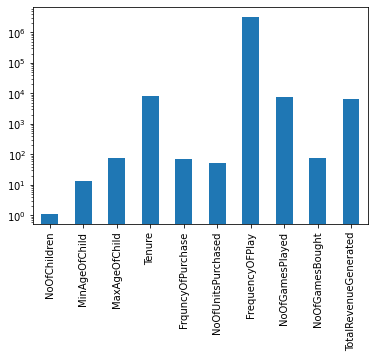

In [ ]:
num_data.var().plot(kind='bar',logy=True)

# Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

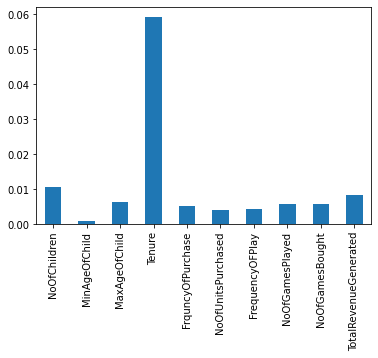

In [ ]:
pd.DataFrame(sc.fit_transform(num_data),columns=num_data.columns).var().plot(kind='bar')

**Tenure - has large variance**

**MinAge of Child - has low Varaince**

In [ ]:
cat_data.head()

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform


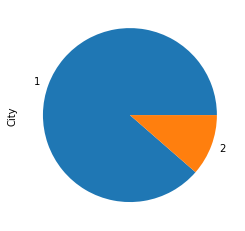

In [ ]:
cat_data['City'].value_counts().plot(kind='pie')

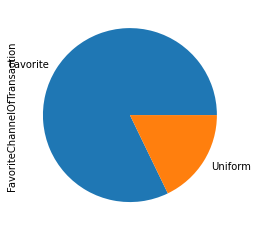

In [ ]:
cat_data['FavoriteChannelOfTransaction'].value_counts().plot(kind='pie')

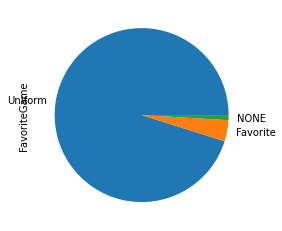

In [ ]:
cat_data['FavoriteGame'].value_counts().plot(kind='pie')

# Correlation

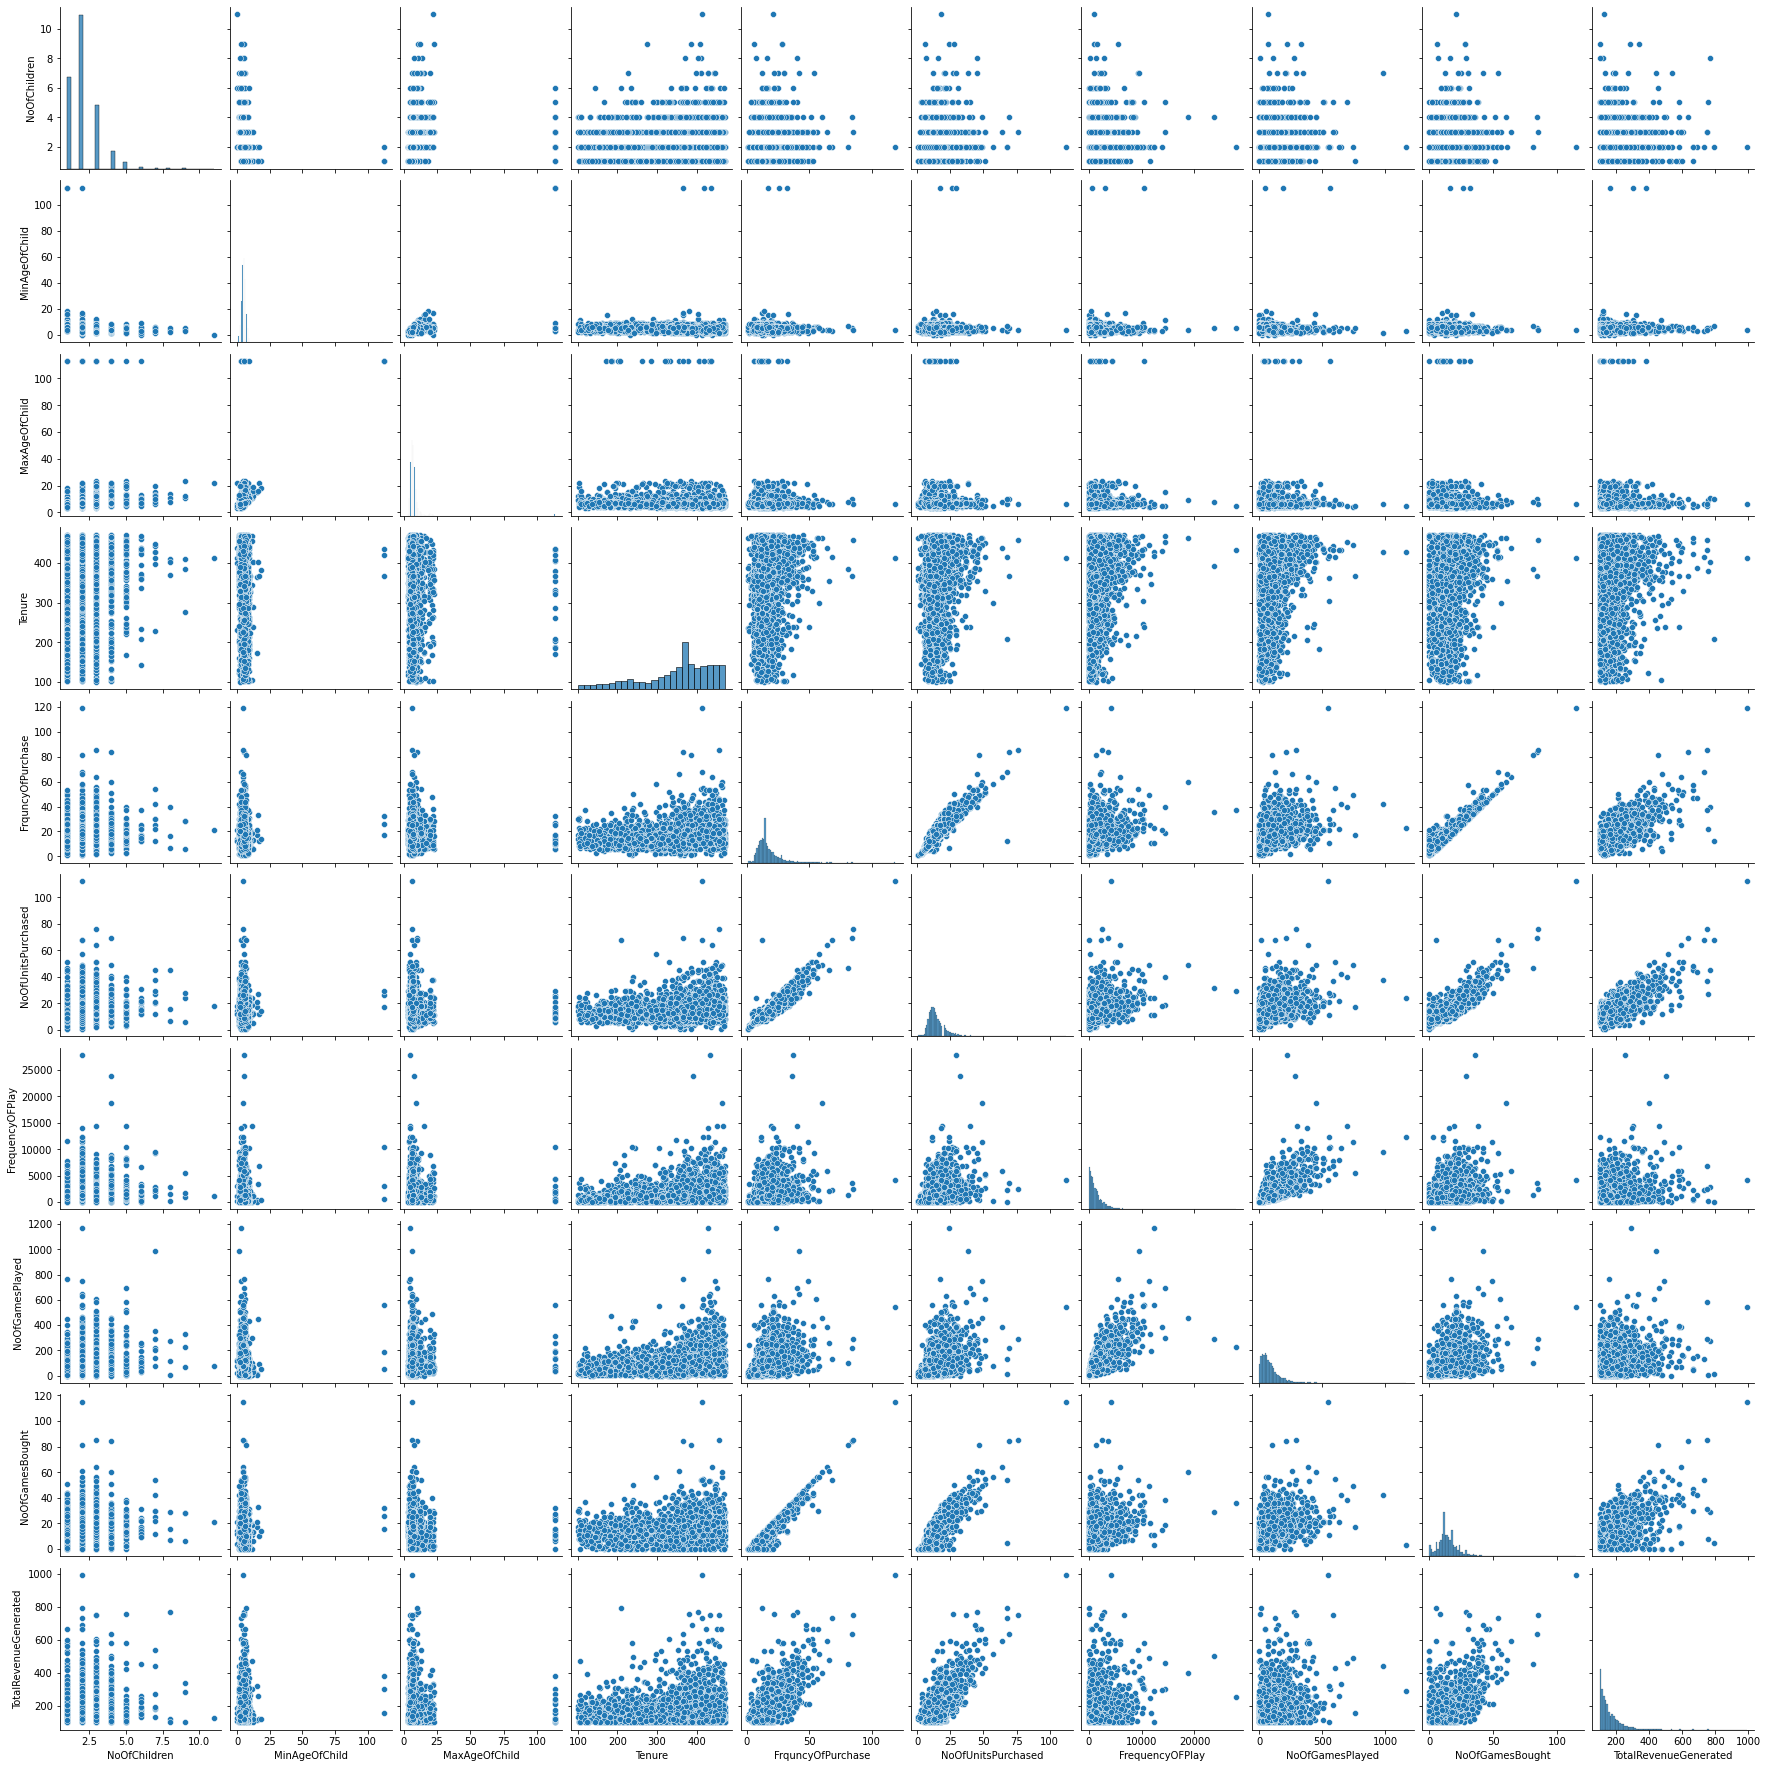

In [ ]:
sns.pairplot(num_data)

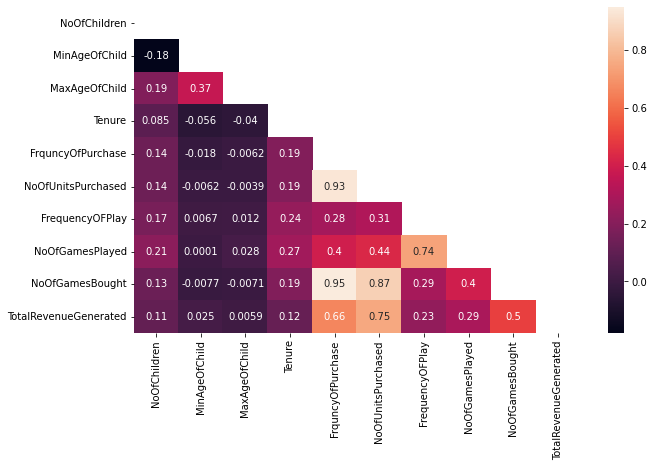

In [ ]:
plt.figure(figsize=(10,6))
corr = num_data.corr()

#mask
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mask)

# Multi Collinearity
 - no.ofunitspurchased,freqofpurchase,no.ofgamesbought
 - no.ofgamesplayes,frequencyofplay

- Frequency of purchase, No of units purchased has high correlation wrt total revenue generated

# Factor Analysis

In [ ]:
cat_data.head()

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform


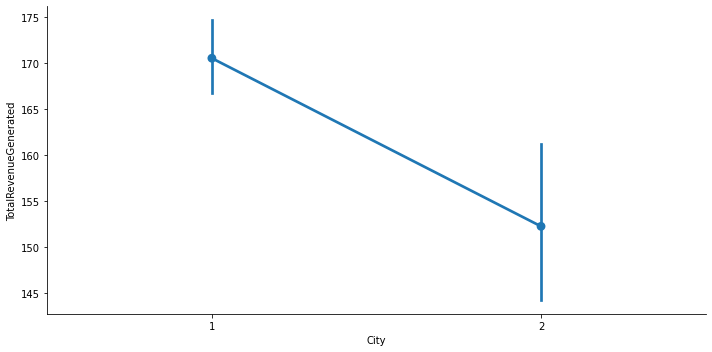

In [ ]:
sns.catplot(x='City',y='TotalRevenueGenerated',kind='point',ci=99,data=data,aspect=2)

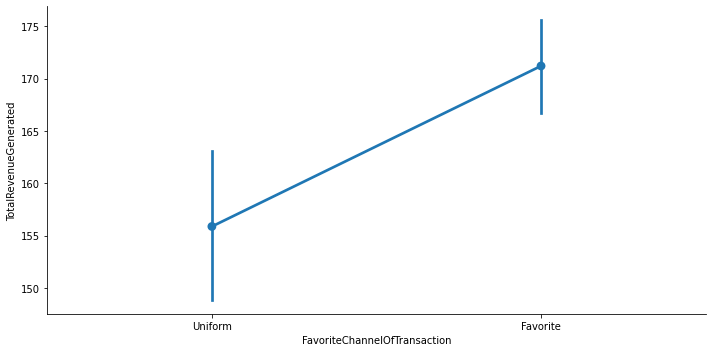

In [ ]:
sns.catplot(x='FavoriteChannelOfTransaction',y='TotalRevenueGenerated',kind='point',ci=99,data=data,aspect=2)

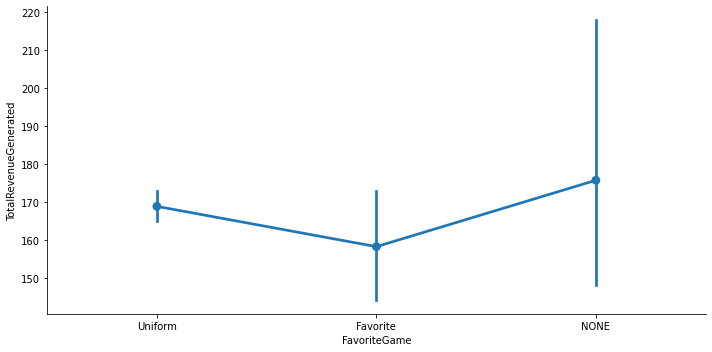

In [ ]:
sns.catplot(x='FavoriteGame',y='TotalRevenueGenerated',kind='point',ci=99,data=data,aspect=2)

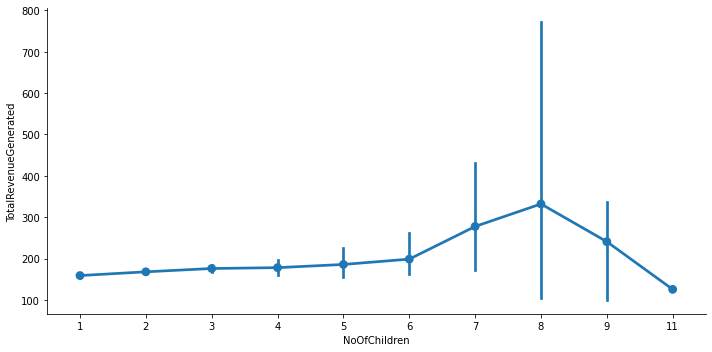

In [ ]:
sns.catplot(x='NoOfChildren',y='TotalRevenueGenerated',kind='point',ci=99,data=data,aspect=2)

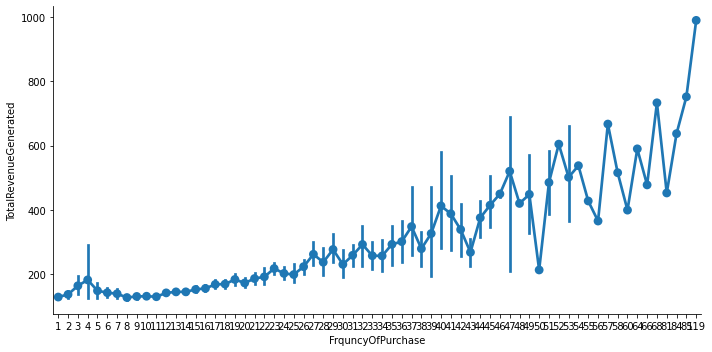

In [ ]:
sns.catplot(x='FrquncyOfPurchase',y='TotalRevenueGenerated',kind='point',ci=99,data=data,aspect=2)

# Conclusion

1. **CustomerID** is unique key and has to drop it.
2. **City, FavoriteChannelOfTransaction,FavoriteGame** are catrgorial varibales for that we need to create n-1 dummies.
3. **Tenure** has highest variance whereas **MinAgeOfChild** has least variance
4. From pairplot **MinAgeOfChild** and **MaxAgeOfChild** has outlier.
5. There is **MultiColinearity** effect between the variables
 - FreqOfPurchase & NoOfUnitsPurchased
 - FreqOfPurchase & NoOfGamesBought
 - NoOfUnitsPurchased & NoOfGamesBought
 - FreqOfPlay & NoOfGamesPlay
6. FactorAnalysis:
 - Categorial Data
     - **City, FavoriteChannelTransaction** has good correlation wrt Total Revenue Generated
 - Numerical Data
     - **FreqOfPurchased, NoOfUnitsPurchased, NoOfGamesBought** has good correlation wrt Total Revenue Generated

# Data Preprocessing

In [ ]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
data.drop('CustomerID',axis=1,inplace=True)

In [ ]:
new_data = data[data['MinAgeOfChild']<100]

In [ ]:
new_data = new_data[new_data['MaxAgeOfChild']<100]

# Split the Data intto dependent and independent

In [ ]:
new_data.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1:]

In [ ]:
# Split the data into numerical and catrgorical

x_num = X.drop(['City', 'FavoriteChannelOfTransaction',  'FavoriteGame'],axis=1)
x_cat = X[['City', 'FavoriteChannelOfTransaction',  'FavoriteGame']]

In [ ]:
x_num

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought
0,2,3,8,210,11,11,2344,108,10
1,2,3,6,442,20,20,245,22,7
2,4,3,5,424,18,18,1059,130,18
3,1,6,6,261,11,9,365,34,11
4,3,6,9,422,44,31,1066,102,44
...,...,...,...,...,...,...,...,...,...
3204,2,4,6,365,16,16,827,78,16
3205,2,2,5,348,20,20,2933,294,13
3206,2,5,7,341,16,13,1250,126,16
3207,2,6,7,368,18,14,1364,122,18


In [ ]:
x_cat

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform
...,...,...,...
3204,1,Favorite,Uniform
3205,1,Favorite,Uniform
3206,1,Uniform,Uniform
3207,1,Favorite,Uniform


In [ ]:
# for categorical data we need to create dummies
city_dum = pd.get_dummies(x_cat['City'],prefix='city')
fct_dum = pd.get_dummies(x_cat['FavoriteChannelOfTransaction'],prefix='fct')
fg_dum = pd.get_dummies(x_cat['FavoriteGame'],prefix='fg')

In [ ]:
fct_dum.head()

,fct_Favorite,fct_Uniform
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
city_dum

,city_1,city_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3204,1,0
3205,1,0
3206,1,0
3207,1,0


In [ ]:
dummies = pd.concat((city_dum.drop('city_2',axis=1),fct_dum.drop('fct_Uniform',axis=1),fg_dum.drop('fg_NONE',axis=1)),axis=1)

In [ ]:
dummies.head()

,city_1,fct_Favorite,fg_Favorite,fg_Uniform
0,1,0,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1


In [ ]:
from pandas.core.arrays.integer import safe_cast
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scy = StandardScaler()

In [ ]:
x_num_norm = pd.DataFrame(sc.fit_transform(x_num.values),columns=x_num.columns)

In [ ]:
y_norm = pd.DataFrame(scy.fit_transform(y.values),columns=y.columns)

In [ ]:
dummies.reset_index(inplace=True)

In [ ]:
x_norm = pd.concat((x_num_norm,dummies),axis=1)

In [ ]:
x_norm.isnull().sum()

NoOfChildren          0
MinAgeOfChild         0
MaxAgeOfChild         0
Tenure                0
FrquncyOfPurchase     0
NoOfUnitsPurchased    0
FrequencyOFPlay       0
NoOfGamesPlayed       0
NoOfGamesBought       0
index                 0
city_1                0
fct_Favorite          0
fg_Favorite           0
fg_Uniform            0
dtype: int64

In [ ]:
os.mkdir('preprocessing')

In [ ]:
import pickle

In [ ]:
pickle.dump(x_norm,open('preprocessing/x_norm.pickle','wb'))
pickle.dump(y_norm,open('preprocessing/y_norm.pickle','wb'))